# 1. Limpieza de Datos:
- Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
- Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
- Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
- Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler      
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

# Cargar los datos
df = pd.read_csv("../Data/customer_churn_dataset-training-master.csv")
df

C:\Users\Acer\AppData\Local\Temp\ipykernel_13140\3662319792.py:12: DtypeWarning: Columns (0,1,3,4,5,6,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/customer_churn_dataset-training-master.csv")


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932,17,1
1,3,65,Female,49,1,10,8,Basic,Monthly,557,6,1
2,4,55,Female,14,4,6,18,Basic,Quarterly,185,3,1
3,5,58,Male,38,21,7,7,Standard,Monthly,396,29,1
4,6,23,Male,32,20,5,8,Basic,Monthly,617,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995,42,Male,54,15,1,3,Premium,Annual,716.38,8,0
440829,449996,25,Female,8,13,1,20,Premium,Annual,745.38,2,0
440830,449997,26,Male,35,27,1,5,Standard,Quarterly,977.31,9,0
440831,449998,28,Male,55,14,2,0,Standard,Quarterly,602.55,2,0


Se detecta que el diccionario de datos no son el mismo que se detallo para el examen.
CustomerID: Identificador único de cada cliente.
Age: Edad del cliente.
Gender: Género del cliente (Hombre o Mujer).
Tenure: Número de meses que el cliente ha utilizado el servicio.
Usage Frequency: Frecuencia de uso del servicio por parte de los clientes.
Support Calls: número de llamadas que los clientes han realizado al soporte.
Payment Delay: Número de pagos retrasados ​​(en días).
Subscription Type: el tipo de suscripción del cliente (Básica, Estándar).
Contract Length: Plazo del contrato (mensual, trimestral, anual).
Total Spend: Monto total gastado por el cliente.
Last Interaction: Número de días desde la última interacción con la empresa.
Churn: Valor binario que indica si el cliente abandonó el servicio o no (1: se fue, 0: permaneció).

In [36]:
# se verifica los duplicados
df_duplicates = df.duplicated().sum()
print("\nValores faltantes:")
print(df.isnull().sum())
print("\nDuplicados:")
print(df.duplicated().sum())



Valores faltantes:
CustomerID            0
Age                   0
Gender                0
Tenure                0
Usage Frequency       0
Support Calls         0
Payment Delay         0
Subscription Type     0
Contract Length       0
Total Spend           0
Last Interaction      0
Churn                 0
dtype: int64

Duplicados:
0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   CustomerID          440833 non-null  object
 1   Age                 440833 non-null  object
 2   Gender              440833 non-null  object
 3   Tenure              440833 non-null  object
 4   Usage Frequency     440833 non-null  object
 5   Support Calls       440833 non-null  object
 6   Payment Delay       440833 non-null  object
 7   Subscription Type   440833 non-null  object
 8   Contract Length     440833 non-null  object
 9   Total Spend         440833 non-null  object
 10  Last Interaction    440833 non-null  object
 11  Churn               440833 non-null  object
dtypes: object(12)
memory usage: 40.4+ MB


In [38]:
print(df.columns)

Index(['CustomerID ', 'Age ', 'Gender ', 'Tenure ', 'Usage Frequency ',
       'Support Calls ', 'Payment Delay ', 'Subscription Type ',
       'Contract Length ', 'Total Spend ', 'Last Interaction ', 'Churn'],
      dtype='object')


In [39]:
#Se identifica espacios en los nombres de las columnas 
df.columns = df.columns.str.replace(' ', '')


In [40]:
df.isna().sum()

CustomerID          0
Age                 0
Gender              0
Tenure              0
UsageFrequency      0
SupportCalls        0
PaymentDelay        0
SubscriptionType    0
ContractLength      0
TotalSpend          0
LastInteraction     0
Churn               0
dtype: int64

In [41]:
#Ajuste de tipos de datos ya que todo esta como Object
#convertir columnas a numeros
col_numeric =  ['CustomerID', 'Age', 'Tenure', 'UsageFrequency','SupportCalls', 'PaymentDelay', 'TotalSpend', 'LastInteraction', 'Churn',]

for i in col_numeric:
    df[i] = pd.to_numeric(df[i], errors='coerce')

#converti columnas a categoricas

col_categorias = ['Gender', 'SubscriptionType', 'ContractLength',]

for i in col_categorias:
    df[i] = df[i].astype('category')  


print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   CustomerID        440832 non-null  float64 
 1   Age               440832 non-null  float64 
 2   Gender            440833 non-null  category
 3   Tenure            440832 non-null  float64 
 4   UsageFrequency    440832 non-null  float64 
 5   SupportCalls      440832 non-null  float64 
 6   PaymentDelay      440832 non-null  float64 
 7   SubscriptionType  440833 non-null  category
 8   ContractLength    440833 non-null  category
 9   TotalSpend        440832 non-null  float64 
 10  LastInteraction   440832 non-null  float64 
 11  Churn             440832 non-null  float64 
dtypes: category(3), float64(9)
memory usage: 31.5 MB
None


In [42]:
#vuelvo a verificar si no hay valores faltantes 
df.isna().sum()


CustomerID          1
Age                 1
Gender              0
Tenure              1
UsageFrequency      1
SupportCalls        1
PaymentDelay        1
SubscriptionType    0
ContractLength      0
TotalSpend          1
LastInteraction     1
Churn               1
dtype: int64

In [43]:
# Lista de columnas categóricas que deseas analizar
col_categorias = ['Gender', 'SubscriptionType', 'ContractLength']

# Obtener valores únicos para las columnas categóricas seleccionadas
for col in col_categorias:
    if col in df.columns:  # Verificar que la columna existe en el DataFrame
        print(f"Valores únicos en la columna '{col}':")
        print(df[col].unique())
        print("-" * 40)
    else:
        print(f"La columna '{col}' no existe en el DataFrame.")

Valores únicos en la columna 'Gender':
['Female ', 'Male   ', '       ']
Categories (3, object): ['       ', 'Female ', 'Male   ']
----------------------------------------
Valores únicos en la columna 'SubscriptionType':
['Standard          ', 'Basic             ', 'Premium           ', '                  ']
Categories (4, object): ['                  ', 'Basic             ', 'Premium           ', 'Standard          ']
----------------------------------------
Valores únicos en la columna 'ContractLength':
['Annual          ', 'Monthly         ', 'Quarterly       ', '                ']
Categories (4, object): ['                ', 'Annual          ', 'Monthly         ', 'Quarterly       ']
----------------------------------------


In [44]:
# Eliminar filas con valores vacíos en las columnas categóricas
df = df[df['Gender'] != '']
df = df[df['SubscriptionType'] != '']
df = df[df['ContractLength'] != '']


In [45]:
# Eliminar espacios al principio y al final de las cadenas en las columnas categóricas
df['Gender'] = df['Gender'].str.strip()
df['SubscriptionType'] = df['SubscriptionType'].str.strip()
df['ContractLength'] = df['ContractLength'].str.strip()

In [46]:
# Verificar valores únicos después de la limpieza
for col in ['Gender', 'SubscriptionType', 'ContractLength']:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print("-" * 40)


Valores únicos en la columna 'Gender':
['Female' 'Male' '']
----------------------------------------
Valores únicos en la columna 'SubscriptionType':
['Standard' 'Basic' 'Premium' '']
----------------------------------------
Valores únicos en la columna 'ContractLength':
['Annual' 'Monthly' 'Quarterly' '']
----------------------------------------


In [47]:
#decido eliminar los valores faltantes 
df.dropna(inplace=True)
df.isna().sum()

CustomerID          0
Age                 0
Gender              0
Tenure              0
UsageFrequency      0
SupportCalls        0
PaymentDelay        0
SubscriptionType    0
ContractLength      0
TotalSpend          0
LastInteraction     0
Churn               0
dtype: int64

2. Exploración de Datos:
- Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
- Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.


In [48]:
# Estadísticas descriptivas para el conjunto de entrenamiento
df.describe()


,CustomerID,Age,Tenure,UsageFrequency,SupportCalls,PaymentDelay,TotalSpend,LastInteraction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


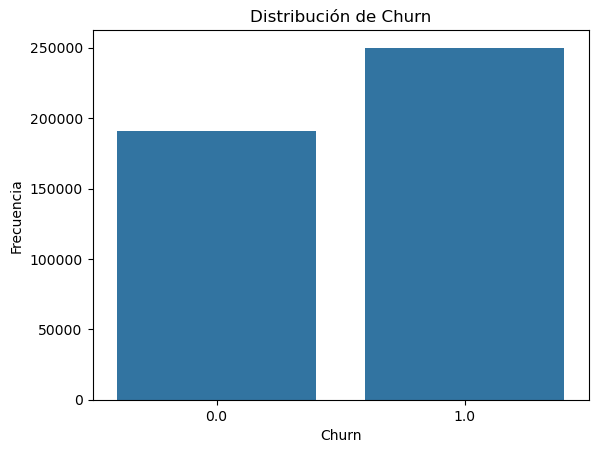

In [49]:
# Gráfico de barras para Churn (Valor objetivo)
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Frecuencia')
plt.show()


En este grafico se puede observar que hay una mayor frecuencia de abandono del servicio.

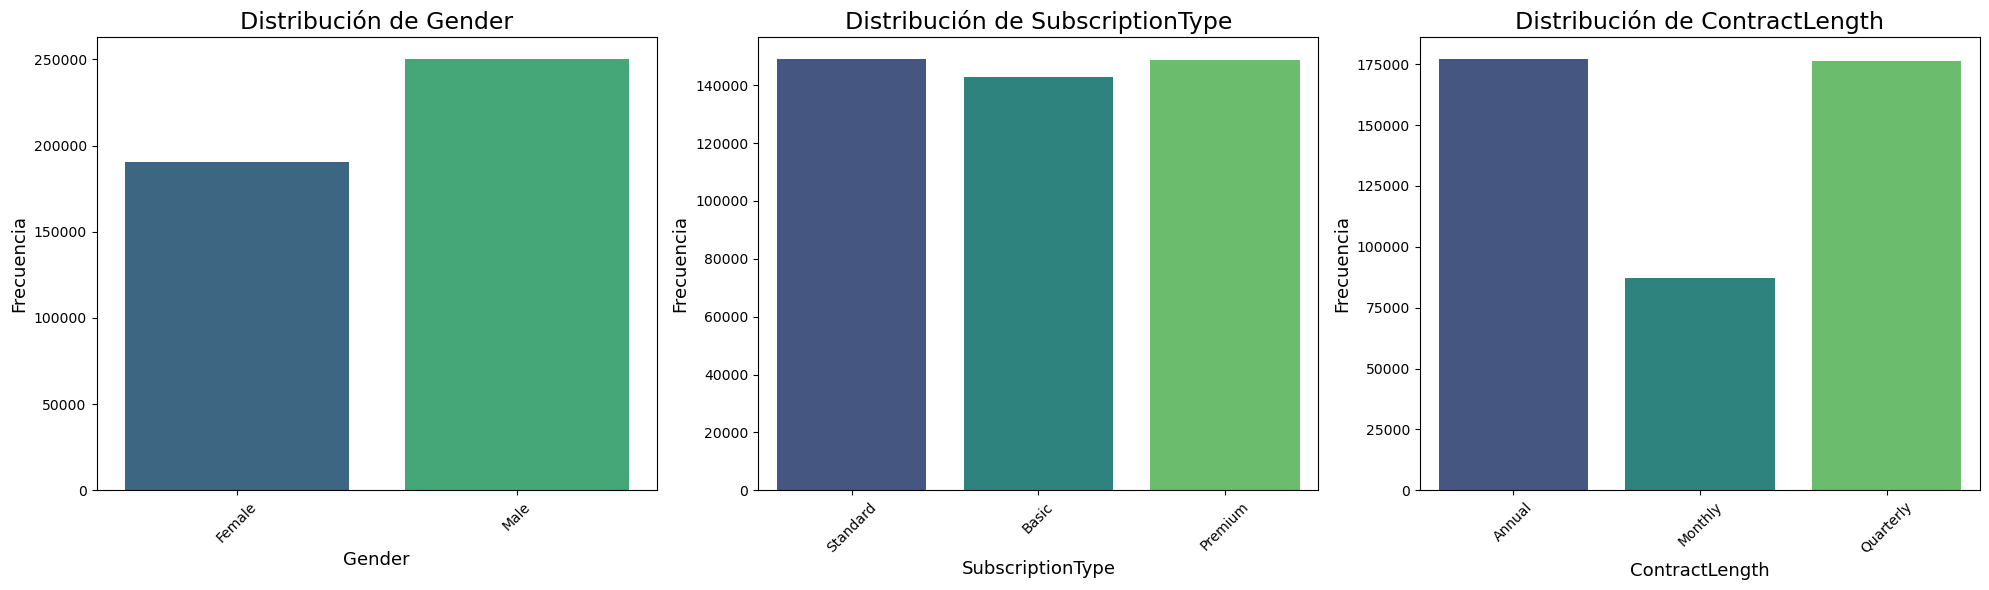

In [50]:
#Distribucion de frecuencia para las variables categoricas
col_categorias = ['Gender', 'SubscriptionType', 'ContractLength'] 
# Crear los subgráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Trazar gráficos de barras para cada variable categórica
for i, col in enumerate(col_categorias):
    sns.countplot(x=col, data=df, hue=col, palette='viridis', ax=axes[i], legend=False)
    axes[i].set_title(f'Distribución de {col}', fontsize=17)
    axes[i].set_xlabel(col, fontsize=13)
    axes[i].set_ylabel('Frecuencia', fontsize=13)
    axes[i].tick_params(axis='x', rotation=45)

# Ajustar el espaciado entre los gráficos
plt.tight_layout()
plt.show()

Se puede distinguir en estos graficos de la distribucion de las variables categoricas que la frecuencia de genero es mayor en masculinos, la distribucion respecto al tipo de suscripcion es casi equilibrada, y por ultimo hablando del plazo de contrato, es menor la cantidad de contratos mensuales.

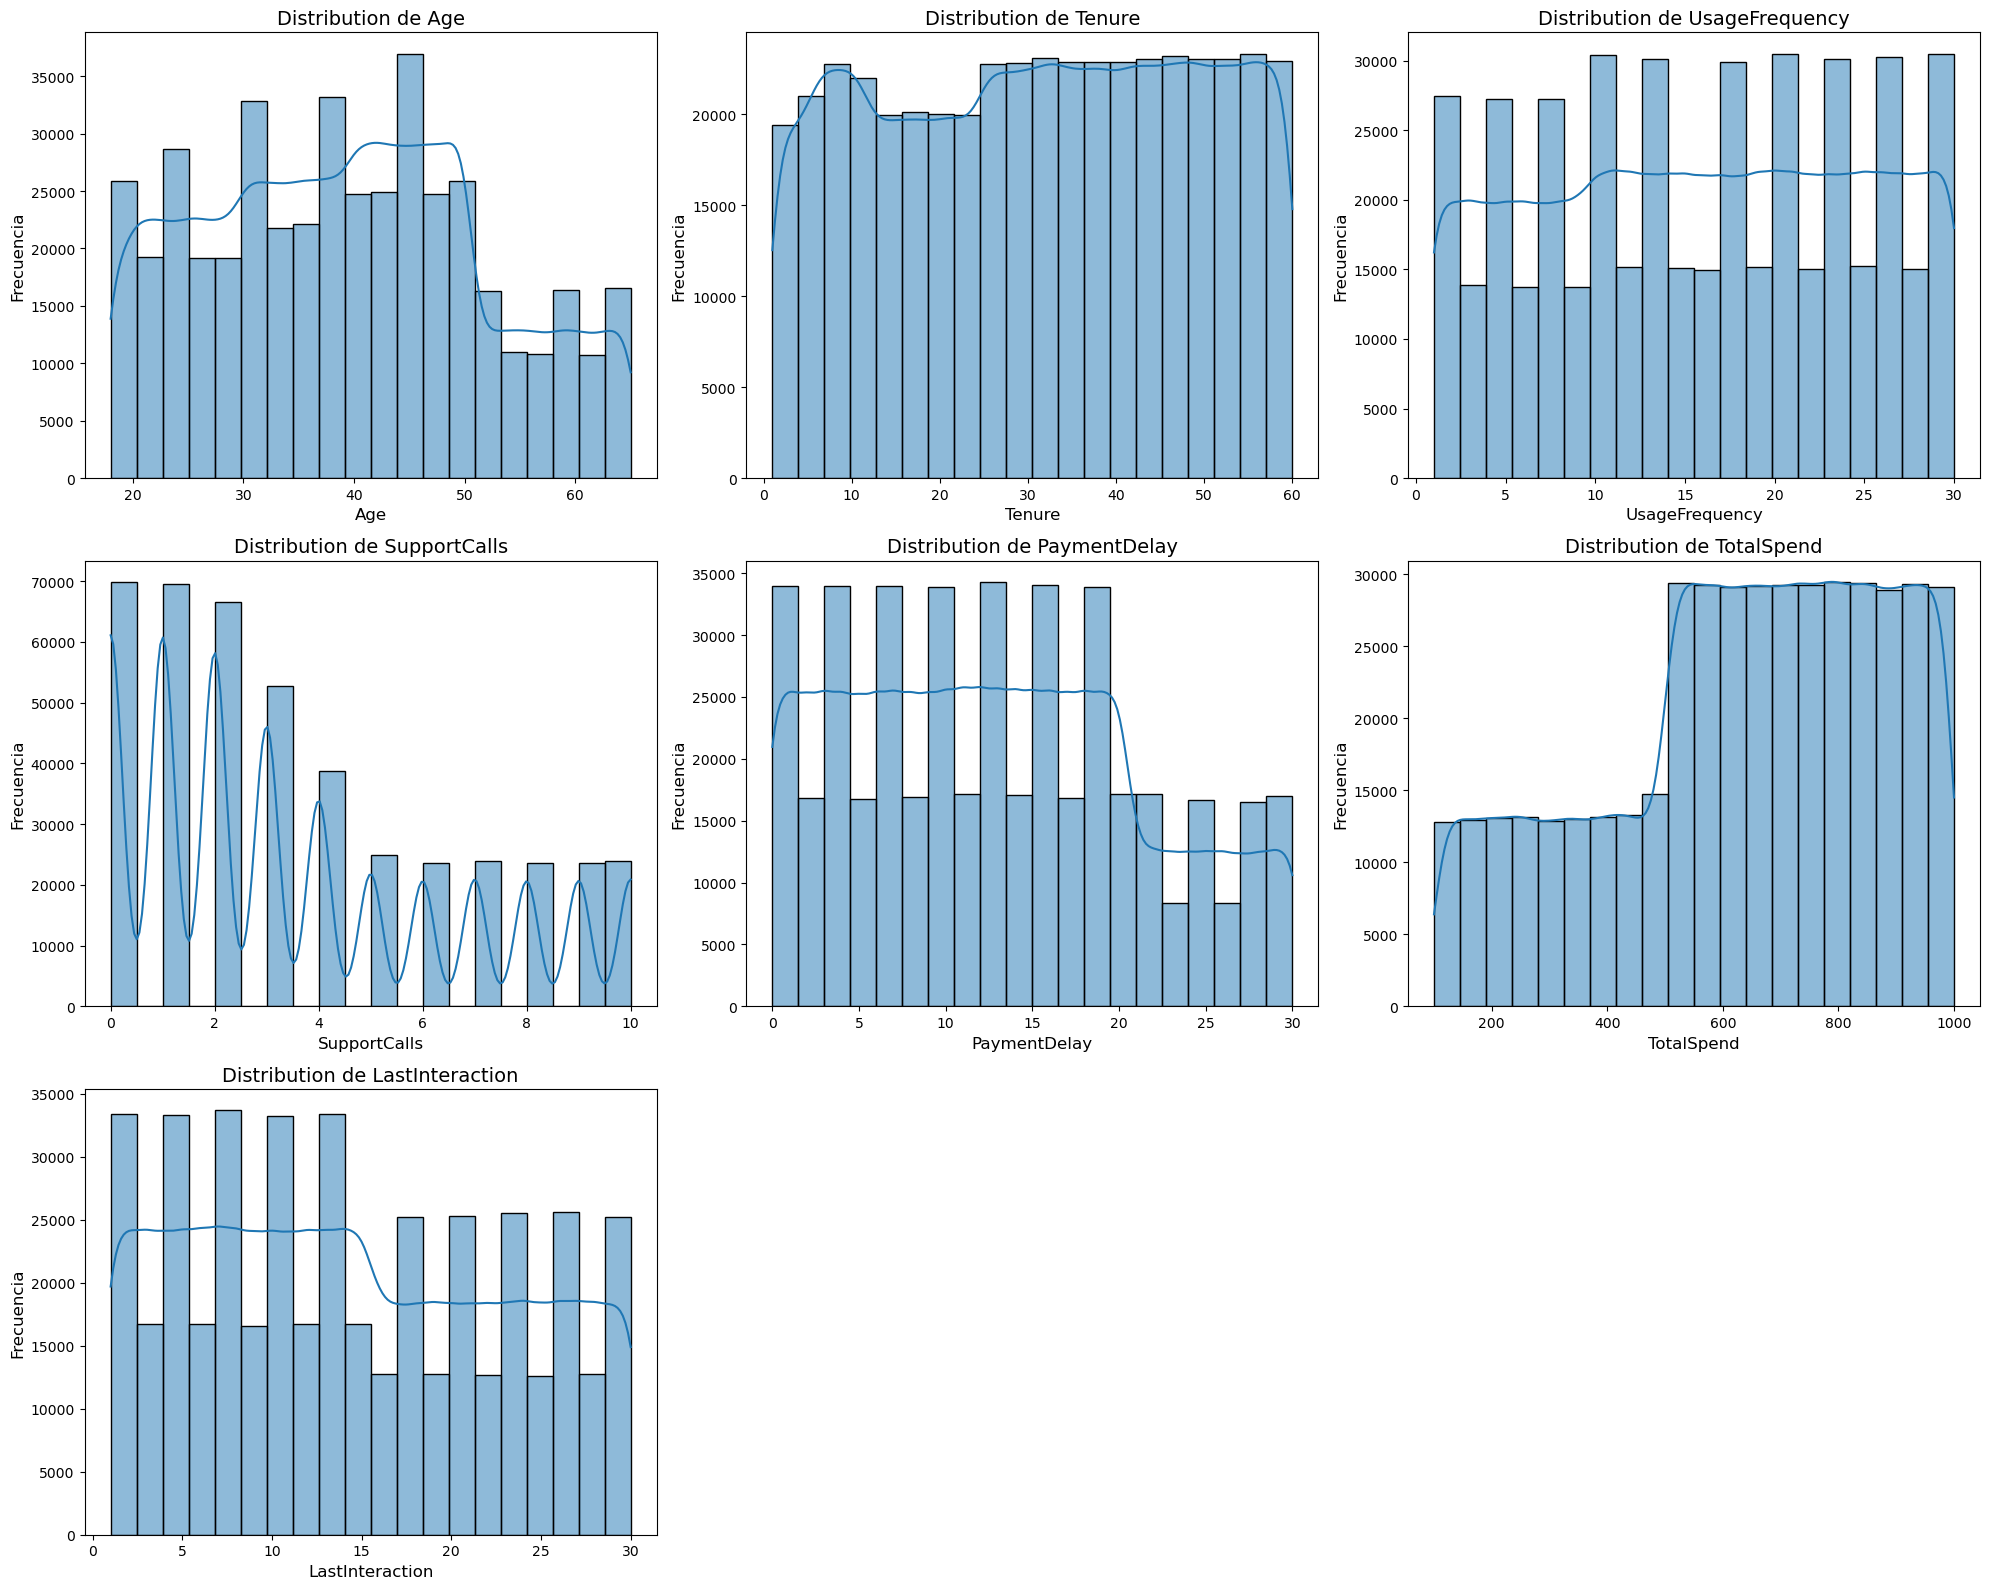

In [51]:
col_numeric = ['Age', 'Tenure', 'UsageFrequency', 'SupportCalls', 
                  'PaymentDelay', 'TotalSpend', 'LastInteraction']

# Plot histograms for numerical variables
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
axes = axes.flatten()

for i, col in enumerate(col_numeric):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution de {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frecuencia', fontsize=12)

# Remove empty subplot
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])


plt.tight_layout()
plt.show()

Variables numéricas:

- Edad:
Los datos están distribuidos de manera uniforme, con algunos picos en el grupo de edad de 30 a 50 años.
- Tenencia (Tiempo de uso):
El tiempo de uso del servicio oscila entre 0 y 60 meses.
- Frecuencia de uso:
Distribución bastante uniforme de 0 a 30 veces.
- Llamadas de soporte (Número de llamadas de soporte):
La mayoría de los clientes llaman menos de 3 veces.
- Retraso en el pago:
El mayor número de morosidad se concentra entre los 10 y 20 meses.
- Gasto total:
El gasto se centra principalmente en 500 y 1.000.
Son muy pocos los clientes que gastan menos de 400.
- Última interacción (Última hora de interacción):
Las últimas interacciones se distribuyen uniformemente de 0 a 30 días.

c:\Users\Acer\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


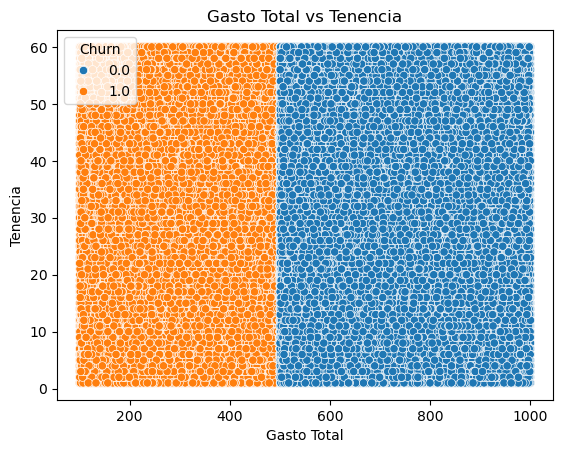

In [52]:
# Diagrama de dispersión entre Total Spend y Tenure
sns.scatterplot(x='TotalSpend', y='Tenure', hue='Churn', data=df)
plt.title('Gasto Total vs Tenencia')
plt.xlabel('Gasto Total')
plt.ylabel('Tenencia')
plt.show()


In [53]:
# Crear un objeto de LabelEncoder
le = LabelEncoder()

# Aplicar LabelEncoder a las columnas categóricas
df['Gender'] = le.fit_transform(df['Gender'])
df['SubscriptionType'] = le.fit_transform(df['SubscriptionType'])
df['ContractLength'] = le.fit_transform(df['ContractLength'])



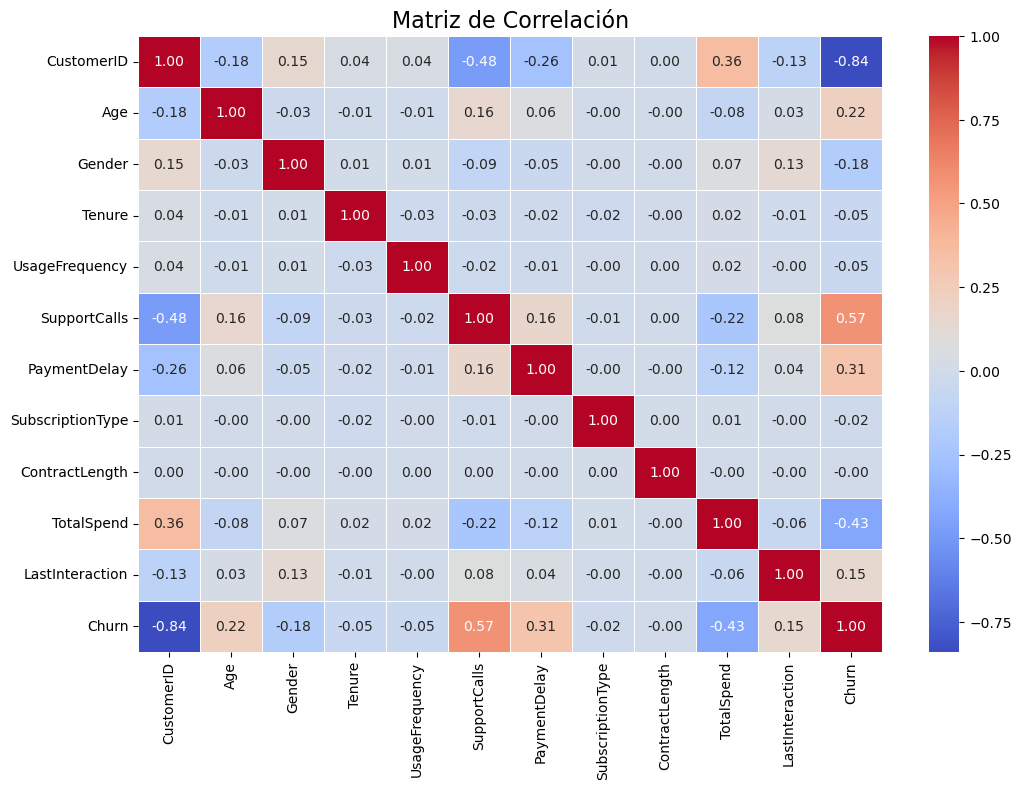

In [54]:
# Crear variables dummy para las columnas categóricas
df = pd.get_dummies(df, drop_first=True)
# Calcular la matriz de correlación
corr_matrix = df.corr()
# Crear la figura con tamaño ajustado
plt.figure(figsize=(12, 8))  
# Graficar el heatmap con anotaciones
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()


- Churn está fuertemente correlacionada con CustomerID (-0.84) y SupportCalls (0.57), sugiriendo que los clientes con más llamadas de soporte y un ID reciente tienen más probabilidades de cancelar.
- SupportCalls y TotalSpend tienen una correlación positiva con Churn, lo que implica que más interacción con soporte y mayor gasto están relacionados con una mayor probabilidad de cancelación.
- TotalSpend tiene una correlación negativa con Churn (-0.43), lo que indica que los clientes que gastan más son menos propensos a cancelar.
- Gender y Age tienen correlaciones bajas con otras variables, indicando poca influencia en Churn y otras características.

# 3. Implementación de Modelos:
- Modelos de Clasificación: Implementa modelos de Adaboost y XGBoost.
- Optimización de Modelos: Utiliza RandomizedSearchCV para optimizar los hiperparámetros de los modelos.
- Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.


In [55]:
# Normalizar las variables numéricas
scaler = StandardScaler()
col_numeric = ['Age', 'Tenure', 'UsageFrequency', 'SupportCalls', 
                  'PaymentDelay', 'TotalSpend', 'LastInteraction']

df[col_numeric] = scaler.fit_transform(df[col_numeric])


In [69]:
# Dividir el dataset en entrenamiento y validación
X = df.drop(['CustomerID', 'Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementar AdaBoost
clf = AdaBoostClassifier(algorithm='SAMME', n_estimators=14, random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_pred_ada = clf.predict(X_test)


In [68]:
import xgboost as xgb
# Crear y entrenar el modelo XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_xgb = xgb_model.predict(X_test)


In [66]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

# Definir el clasificador base (DecisionTreeClassifier) con sus hiperparámetros
base_estimator = DecisionTreeClassifier()

# Definir la configuración de búsqueda para RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01],
    'estimator__max_depth': [ 3, 5],  # Parámetros del estimador base
}

# Crear el modelo de AdaBoost con el estimador base
ada_model = AdaBoostClassifier(estimator=base_estimator)

# RandomizedSearchCV
rand_search_ada = RandomizedSearchCV(ada_model, param_dist, n_iter=10, random_state=42, cv=3)
rand_search_ada.fit(X_train, y_train)

# Mejor modelo
best_ada_model = rand_search_ada.best_estimator_

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Acer\an

In [70]:
# Evaluación de AdaBoost
print("AdaBoost Model Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada)}")
print(f"Precision: {precision_score(y_test, y_pred_ada)}")
print(f"Recall: {recall_score(y_test, y_pred_ada)}")
print(f"F1 Score: {f1_score(y_test, y_pred_ada)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_ada)}")

AdaBoost Model Performance
Accuracy: 0.9517846813433598
Precision: 0.9948414668364594
Recall: 0.9199265527702379
F1 Score: 0.9559184943226007
ROC AUC: 0.9568237445563088


In [71]:
# Evaluación de XGBoost
print("\nXGBoost Model Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb)}")
print(f"Recall: {recall_score(y_test, y_pred_xgb)}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_xgb)}")


XGBoost Model Performance
Accuracy: 0.9998298683180782
Precision: 0.9999600742618729
Recall: 0.9997405396774709
F1 Score: 0.9998502949190096
ROC AUC: 0.9998439976058584


In [72]:
# Comparación de rendimiento
model_comparison = pd.DataFrame({
    'Model': ['AdaBoost', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_ada), accuracy_score(y_test, y_pred_xgb)],
    'Precision': [precision_score(y_test, y_pred_ada), precision_score(y_test, y_pred_xgb)],
    'Recall': [recall_score(y_test, y_pred_ada), recall_score(y_test, y_pred_xgb)],
    'F1 Score': [f1_score(y_test, y_pred_ada), f1_score(y_test, y_pred_xgb)],
    'ROC AUC': [roc_auc_score(y_test, y_pred_ada), roc_auc_score(y_test, y_pred_xgb)],
})

print(model_comparison)

      Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  AdaBoost  0.951785   0.994841  0.919927  0.955918  0.956824
1   XGBoost  0.999830   0.999960  0.999741  0.999850  0.999844


Entre los modelos evaluados, XGBoost supera a AdaBoost en todas las métricas clave:
- Accuracy: 
XGBoost logra casi un 100% de precisión, clasificando correctamente prácticamente todos los casos.
- Precision: 
Su capacidad para evitar falsas alarmas es superior, con un 99.99%.
- Recall: 
Detecta casi todos los clientes que abandonarán (99.97%), minimizando falsos negativos.
- F1 Score: 
Balancea perfectamente precisión y recall, alcanzando un 99.99%.
- ROC AUC: 
Discrimina mejor entre los clientes que abandonan y los que no, con un 99.98%.

XGBoost es el modelo más adecuado, ya que ofrece un rendimiento casi perfecto, especialmente en recall y F1 Score, fundamentales para un problema de churn, donde identificar a los clientes en riesgo es prioritario.

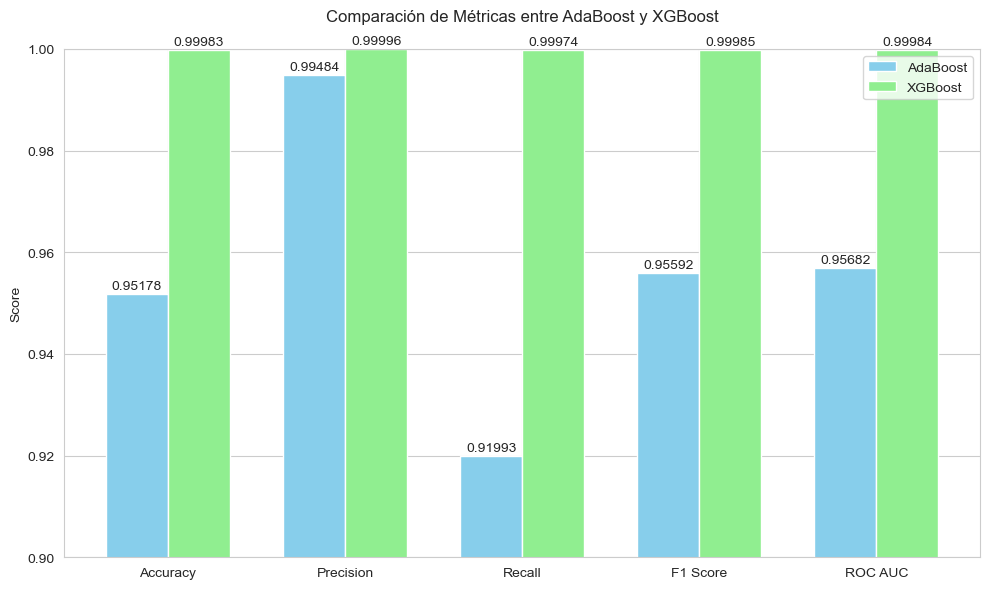

In [83]:

# Métricas de los modelos
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
adaboost_scores = [0.951785, 0.994841, 0.919927, 0.955918, 0.956824]
xgboost_scores = [0.999830, 0.999960, 0.999741, 0.999850, 0.999844]

# Posiciones en el eje x
x = np.arange(len(metrics))

# Configuración del gráfico
width = 0.35  # Ancho de las barras

plt.figure(figsize=(10, 6))

# Gráfico de barras
plt.bar(x - width/2, adaboost_scores, width, label='AdaBoost', color='skyblue')
plt.bar(x + width/2, xgboost_scores, width, label='XGBoost', color='lightgreen')

# Etiquetas y título
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Comparación de Métricas entre AdaBoost y XGBoost', pad=20)
plt.ylim(0.9, 1.0)  # Ajuste del rango para observar mejor las diferencias
plt.legend()

# Mostrar los valores encima de las barras
for i, v in enumerate(adaboost_scores):
    plt.text(x[i] - width/2, v + 0.001, f"{v:.5f}", ha='center')
for i, v in enumerate(xgboost_scores):
    plt.text(x[i] + width/2, v + 0.001, f"{v:.5f}", ha='center')

plt.tight_layout()
plt.show()


XGBoost es el modelo más adecuado para este dataset, ya que ofrece un rendimiento superior en todas las métricas relevantes.
La capacidad de XGBoost para manejar datos complejos y realizar un mejor ajuste al dataset lo convierte en una opción preferible frente a AdaBoost en este caso.